* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [1]:
import pandas as pd

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [3]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [ ]:
df1.columns

### 데이터 연결/확인
* concat

In [ ]:
# concat

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [ ]:
# head

In [ ]:
df.head()

In [ ]:
#tail

In [ ]:
df.tail()

In [ ]:
# 데이터 크기

In [ ]:
df.shape

In [ ]:
# 데이터 정보(사용메모리)

In [ ]:
df.info()

## 데이터 전처리

### 불필요한 컬럼 제거

In [ ]:
# 자전거번호, 대여거치대, 반납거치대 제거

In [5]:
df.drop(['자전거번호', '대여거치대', '반납거치대'], axis=1, inplace=True)

### 자료형 확인/변경

In [ ]:
# 자료형 확인

In [ ]:
df.dtypes

In [ ]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호

In [7]:
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [ ]:
# 메모리 용량 확인

In [ ]:
df.info()

In [ ]:
# datetime형으로 변경 : 대여일시,반납일시

In [8]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [ ]:
# 자료형 변경 확인

In [ ]:
df.dtypes

## 결측치 확인/처리

In [ ]:
# 결측치 확인

In [ ]:
df.isnull().sum()

In [ ]:
# 결측치 제거

In [6]:
df = df.dropna()

In [ ]:
# 결측치 확인

In [ ]:
df.isnull().sum()

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [9]:
df['대여날짜'] = df['대여일시'].dt.date

In [ ]:
df.head()

## 대여날짜 별 대여 건수
* groupby
* to_frame

In [ ]:
# 대여날짜 별 대여건수 추출

In [10]:
df_count = df.groupby('대여날짜').대여일시.count().to_frame()

In [ ]:
df_count

In [ ]:
# 대여날짜 별 대여건수 시각화

In [11]:
df_count.columns=['대여건수']

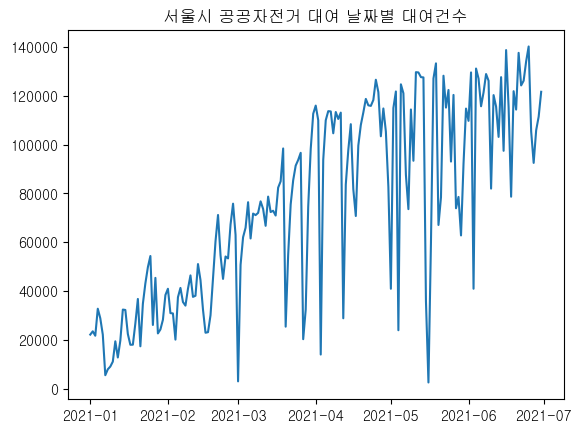

In [12]:
plt.plot(df_count.index, df_count.values)
plt.title('서울시 공공자전거 대여 날짜별 대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [ ]:
# 대여날짜 별 이용시간 추출

In [13]:
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


In [ ]:
# 대여날짜 별 이용시간 시각화

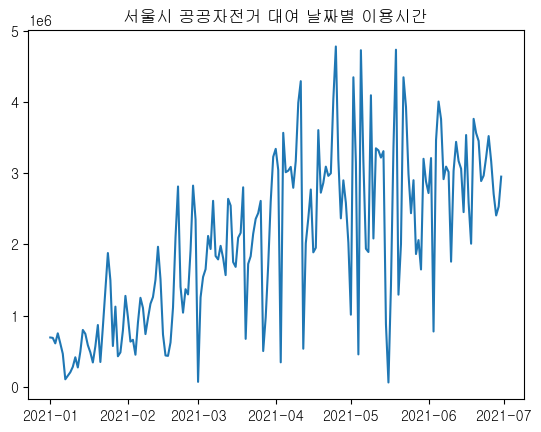

In [14]:
plt.plot(df_time.index, df_time.values)
plt.title('서울시 공공자전거 대여 날짜별 이용시간')
plt.show()

## 대여날짜 별 이용 거리

In [ ]:
# 대여날짜 별 이용거리 추출

In [15]:
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


In [ ]:
# 대여날짜 별 이용거리 시각화

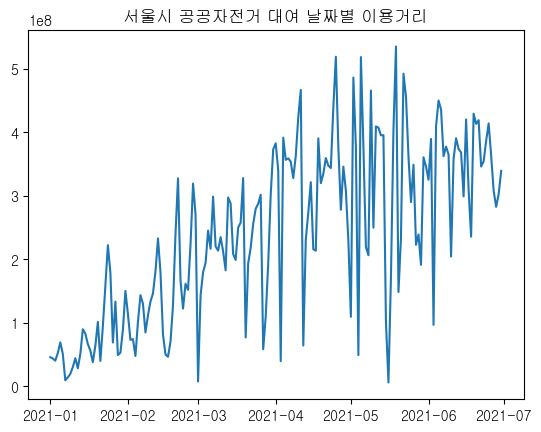

In [16]:
plt.plot(df_distance.index, df_distance.values)
plt.title('서울시 공공자전거 대여 날짜별 이용거리')
plt.show()

## 데이터프레임 합치기

In [17]:
df_data = pd.concat([df_count, df_time, df_distance], axis=1)
df_data

,대여건수,이용시간,이용거리
대여날짜,,,
2021-01-01,22119,692309.0,4.613529e+07
2021-01-02,23463,686580.0,4.409618e+07
2021-01-03,21656,609571.0,4.059830e+07
2021-01-04,32732,750721.0,5.249645e+07
2021-01-05,28819,610227.0,6.944856e+07
...,...,...,...
2021-06-26,105414,3168288.0,3.635015e+08
2021-06-27,92486,2706168.0,3.078146e+08
2021-06-28,105882,2405249.0,2.828124e+08


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [18]:
df['대여시간'] = df['대여일시'].dt.hour

In [19]:
df['반납시간'] = df['반납일시'].dt.hour

In [ ]:
df.dtypes

## 시간대별 대여/반납 현황

In [ ]:
# 시간대별 대여현황

In [20]:
s_rental = df['대여시간'].value_counts()
s_rental

18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: 대여시간, dtype: int64

In [ ]:
# 시간대별 반납현황

In [21]:
s_return = df['반납시간'].value_counts()
s_return

18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: 반납시간, dtype: int64

## 시각화

In [ ]:
# 시간대별 공공자전거 대여건수 시각화

In [22]:
s_rental = s_rental.sort_index()
s_rental

0      240025
1      158905
2      103629
3       68710
4       55391
5       84713
6      188920
7      486775
8      808506
9      499995
10     438084
11     537810
12     623065
13     667237
14     725175
15     816040
16     934211
17    1178279
18    1432779
19     984476
20     825031
21     770378
22     643611
23     341859
Name: 대여시간, dtype: int64

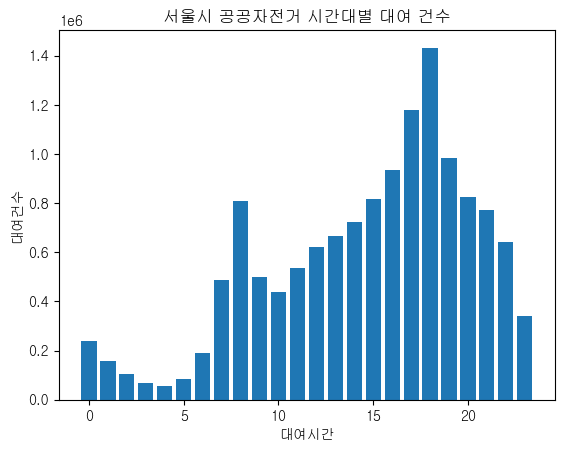

In [23]:
x = s_rental.index
y = s_rental.values
plt.bar(x, y)
plt.title('서울시 공공자전거 시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

In [ ]:
# 시간대별 공공자전거 반납건수 시각화

In [24]:
s_return = s_return.sort_index()
s_return

0      290169
1      190954
2      125912
3       80243
4       60368
5       73983
6      152003
7      389007
8      817076
9      499033
10     402350
11     470053
12     591577
13     628908
14     657826
15     749940
16     880629
17    1097623
18    1437723
19    1125447
20     864644
21     812357
22     768302
23     447477
Name: 반납시간, dtype: int64

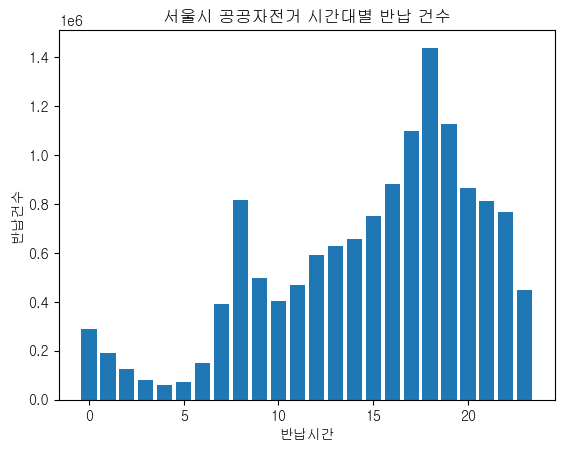

In [25]:
x = s_return.index
y = s_return.values
plt.bar(x, y)
plt.title('서울시 공공자전거 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [ ]:
# 대여 대여소번호 갯수

In [ ]:
df['대여 대여소번호'].nunique()

In [ ]:
# 반납대여소번호 갯수

In [ ]:
df['반납대여소번호'].nunique()

In [ ]:
# 반납대여소 번호 처리 (str형으로 변환)

In [26]:
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [ ]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)

In [27]:
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')

In [ ]:
# 반납대여소 번호 처리 (int형으로 변환)

In [28]:
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

In [ ]:
# 반납대여소 번호 처리 (category형으로 변환)

In [29]:
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

## 대여건수가 가장 많은 대여소 best10

In [ ]:
# value_counts

In [30]:
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [ ]:
# value_counts

In [31]:
df[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [32]:
df_207 = df[df['대여 대여소번호'] == 207]
df_207.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11


### 반납 현황

In [ ]:
# value_counts

In [33]:
df_207[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


### 요일별 대여현황

In [ ]:
#요일컬럼 추가 : strftime('%a')

In [34]:
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

C:\Users\user\AppData\Local\Temp\ipykernel_8224\565122506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [ ]:
# value_counts

In [35]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

### 이용시간 통계

In [ ]:
# 이용시간 평균

In [36]:
df_207['이용시간'].mean()

50.28551344300312

In [ ]:
# 이용시간 최대

In [37]:
df_207['이용시간'].max()

1268.0

In [ ]:
# 이용시간 최소

In [38]:
df_207['이용시간'].min()

1.0

In [ ]:
# 전체데이터 이용시간 평균

In [39]:
df['이용시간'].mean()

27.27823322905529

In [40]:
df['이용시간'].max()

2323.0

In [41]:
df['이용시간'].min()

1.0

## 창동역 2번출구 대여소 이용현황

### 서브셋 만들기

In [43]:
df_1721 = df[df['대여 대여소번호'] == 1721]
df_1721.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
527990,2021-01-01 01:33:32,1721,창동역 2번출구,2021-01-01 02:21:26,1721,창동역 2번출구,47.0,0.00,2021-01-01,1,2
527991,2021-01-01 02:22:02,1721,창동역 2번출구,2021-01-01 02:31:47,1709,쌍문역4번출구 주변,9.0,0.00,2021-01-01,2,2
527992,2021-01-01 02:21:20,1721,창동역 2번출구,2021-01-01 02:36:45,1767,태양중앙교회 앞,15.0,2425.98,2021-01-01,2,2
527993,2021-01-01 04:30:58,1721,창동역 2번출구,2021-01-01 04:49:08,1759,서울북부지방법원 앞,18.0,2787.81,2021-01-01,4,4
527994,2021-01-01 09:38:47,1721,창동역 2번출구,2021-01-01 09:41:48,1762,북한산 한신휴플러스APT앞,3.0,0.00,2021-01-01,9,9


### 반납 현황

In [ ]:
# value_counts

In [44]:
df_1721[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
1762,북한산 한신휴플러스APT앞,1602
1752,창동 주공 4단지 입구 옆,1160
1708,보건소사거리(다비치안경창동점),1011
1721,창동역 2번출구,765
1707,도봉구민회관,744
...,...,...
1420,신내어울공원 앞,1
3525,금호스포츠센터앞,1
3511,응봉역 1번출구,1


### 요일별 대여현황

In [ ]:
#요일컬럼 추가 : strftime('%a')

In [45]:
df_1721['대여요일'] = df_1721['대여일시'].dt.strftime('%a')

C:\Users\user\AppData\Local\Temp\ipykernel_8224\512941119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1721['대여요일'] = df_1721['대여일시'].dt.strftime('%a')


In [ ]:
# value_counts

In [46]:
df_1721['대여요일'].value_counts()

Wed    2330
Fri    2240
Mon    2125
Tue    2070
Thu    1929
Sun    1897
Sat    1866
Name: 대여요일, dtype: int64

### 시각화

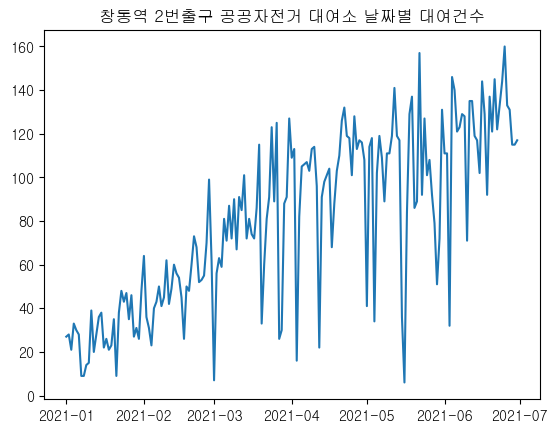

In [47]:
# 대여 날짜별 대여건수
df_1721_count = df_1721.groupby('대여날짜').대여일시.count().to_frame()
df_1721_count.columns = ['대여건수']
plt.plot(df_1721_count.index, df_1721_count.values)
plt.title('창동역 2번출구 공공자전거 대여소 날짜별 대여건수')
plt.show()

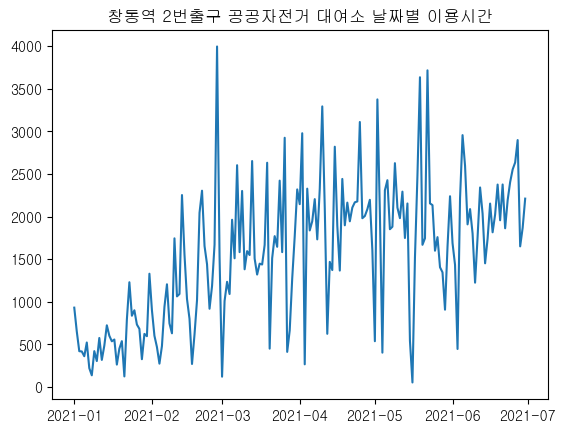

In [65]:
# 대여 날짜별 이용시간
df_1721_time = df_1721.groupby('대여날짜')['이용시간'].sum().to_frame()
plt.plot(df_1721_time.index, df_1721_time.values)
plt.title('창동역 2번출구 공공자전거 대여소 날짜별 이용시간')
plt.show()

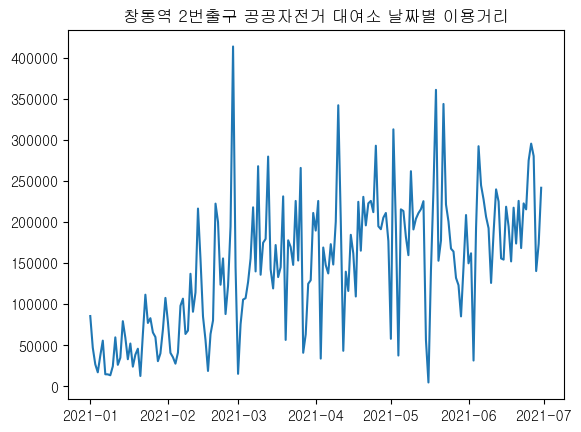

In [49]:
# 대여 날짜별 이용거리
df_1721_distance = df_1721.groupby('대여날짜')['이용거리'].sum().to_frame()
plt.plot(df_1721_distance.index, df_1721_distance.values)
plt.title('창동역 2번출구 공공자전거 대여소 날짜별 이용거리')
plt.show()

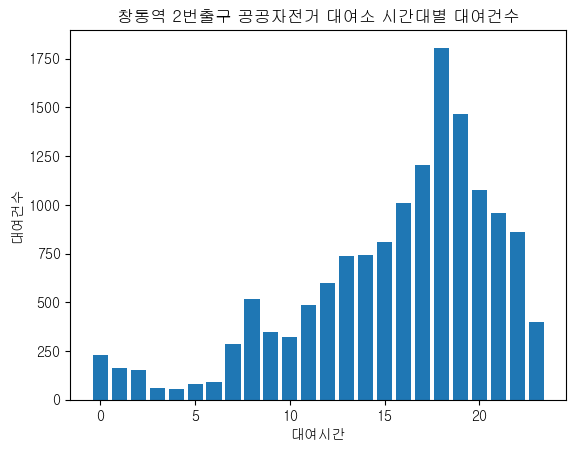

In [53]:
# 시간대별 대여건수
s_1721_rental= df_1721['대여시간'].value_counts().sort_index()
x = s_1721_rental.index
y = s_1721_rental.values
plt.bar(x, y)
plt.title('창동역 2번출구 공공자전거 대여소 시간대별 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

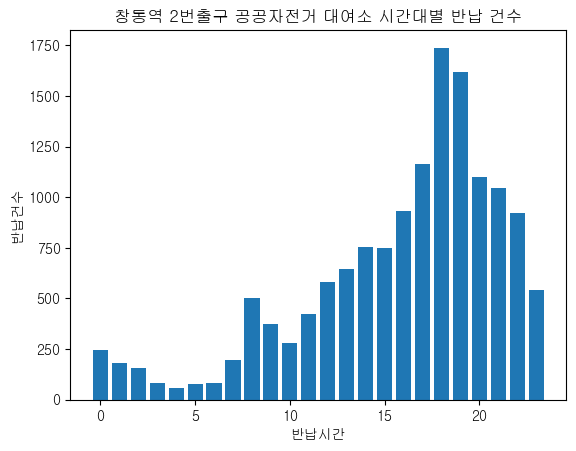

In [54]:
# 시간대별 반납건수
s_1721_return= df_1721['반납시간'].value_counts().sort_index()
x = s_1721_return.index
y = s_1721_return.values
plt.bar(x, y)
plt.title('창동역 2번출구 공공자전거 대여소 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

### 이용시간 통계

In [55]:
# 이용시간 평균

In [56]:
df_1721['이용시간'].mean()

19.438196029605034

In [ ]:
# 이용시간 최대

In [57]:
df_1721['이용시간'].max()

880.0

In [ ]:
# 이용시간 최소

In [58]:
df_1721['이용시간'].min()

1.0

## 원하는 대여소 이용현황 불러오기

## 원하는 대여소 찾기

In [75]:
import numpy as np

In [68]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


In [101]:
# 변수 지정
lst = np.array(df['대여 대여소명'].unique())
place_lst = np.array([])
# 대여소명 1차 입력값
place_init = input('찾는 대여소명을 입력하세요 : ') 
for i in range(2849):
    if place_init in lst[i]: # 입력값이 '대여 대여소명' 컬럼에 있는지 확인하기
        place_lst = np.append(place_lst, lst[i]) # 새로운 array에 추가
print("--------------------------------------------------")
for i in range(len(place_lst)):
    print(place_lst[i]) # array 출력

place_final = input('위 리스트에서 찾으시는 대여소명을 입력하세요 : ') # 대여소명 최종 입력값

찾는 대여소명을 입력하세요 : 신촌
--------------------------------------------------
신촌역(2호선) 1번출구 옆
신촌역(2호선) 6번출구 옆
신촌역(2호선) 7번출구 앞
NH농협 신촌지점 앞
신촌동 제1공영주차장 앞
e편한세상 신촌4단지 앞
신촌역 4번출구
위 리스트에서 찾으시는 대여소명을 입력하세요 : 신촌역(2호선) 7번출구 앞


### 서브셋 만들기

In [102]:
df_user = df[df['대여 대여소명'] == place_final]
df_user.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
14678,2021-01-01 02:13:34,130,신촌역(2호선) 7번출구 앞,2021-01-01 02:23:17,107,신한은행 서교동금융센터점 앞,9.0,1832.36,2021-01-01,2,2
14679,2021-01-01 12:10:09,130,신촌역(2호선) 7번출구 앞,2021-01-01 12:35:37,121,마포소방서 앞,25.0,580.47,2021-01-01,12,12
14680,2021-01-01 13:43:18,130,신촌역(2호선) 7번출구 앞,2021-01-01 13:49:23,118,광흥창역 2번출구 앞,6.0,940.00,2021-01-01,13,13
14681,2021-01-01 16:41:14,130,신촌역(2호선) 7번출구 앞,2021-01-01 16:48:43,119,서강나루 공원,7.0,1283.60,2021-01-01,16,16
14682,2021-01-01 16:15:04,130,신촌역(2호선) 7번출구 앞,2021-01-01 17:01:58,146,마포역 2번출구 뒤,46.0,3680.04,2021-01-01,16,17


### 반납현황

In [ ]:
# value_counts

In [103]:
df_user[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
3011,경의선(노고산동),444
130,신촌역(2호선) 7번출구 앞,438
121,마포소방서 앞,352
118,광흥창역 2번출구 앞,313
119,서강나루 공원,308
...,...,...
623,서울시립대 정문 앞,1
2377,수서역 5번출구 뒤,1
2404,대모산입구역 4번 출구 앞,1


### 요일별 대여현황

In [ ]:
#요일컬럼 추가 : strftime('%a')

In [104]:
df_user['대여요일'] = df_user['대여일시'].dt.strftime('%a')

C:\Users\user\AppData\Local\Temp\ipykernel_8224\727624292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['대여요일'] = df_user['대여일시'].dt.strftime('%a')


In [ ]:
# value_counts

In [105]:
df_user['대여요일'].value_counts()

Wed    1572
Sun    1509
Fri    1441
Tue    1388
Mon    1369
Sat    1326
Thu    1184
Name: 대여요일, dtype: int64

### 시각화

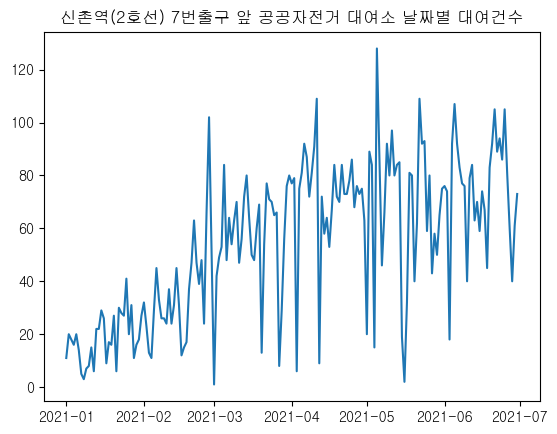

In [107]:
# 대여 날짜별 대여건수
df_user_count = df_user.groupby('대여날짜').대여일시.count().to_frame()
df_user_count.columns = ['대여건수']
plt.plot(df_user_count.index, df_user_count.values)
plt.title(place_final + ' 공공자전거 대여소 날짜별 대여건수')
plt.show()

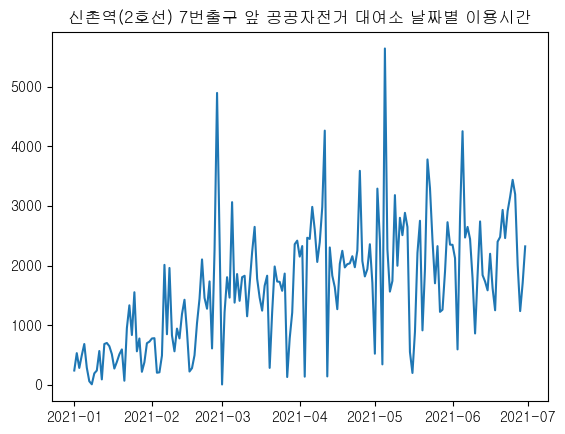

In [108]:
# 대여 날짜별 이용시간
df_user_time = df_user.groupby('대여날짜')['이용시간'].sum().to_frame()
plt.plot(df_user_time.index, df_user_time.values)
plt.title(place_final + ' 공공자전거 대여소 날짜별 이용시간')
plt.show()

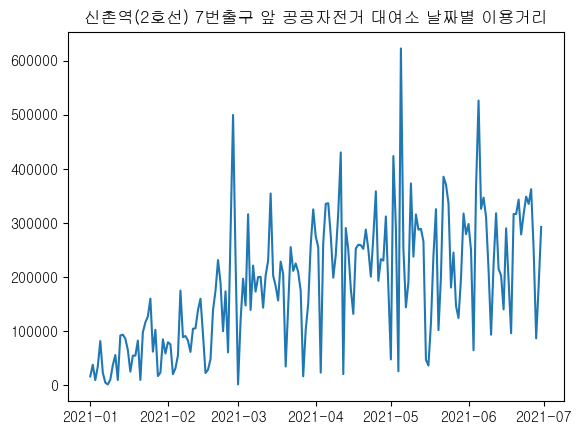

In [109]:
# 대여 날짜별 이용거리
df_user_distance = df_user.groupby('대여날짜')['이용거리'].sum().to_frame()
plt.plot(df_user_distance.index, df_user_distance.values)
plt.title(place_final + ' 공공자전거 대여소 날짜별 이용거리')
plt.show()

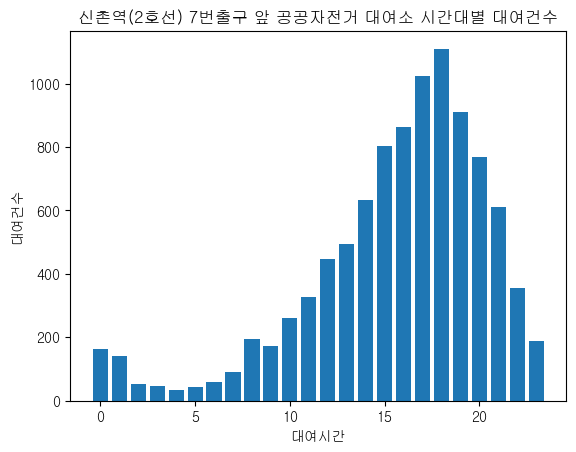

In [110]:
# 시간대별 대여건수
s_user_rental= df_user['대여시간'].value_counts().sort_index()
x = s_user_rental.index
y = s_user_rental.values
plt.bar(x, y)
plt.title(place_final + ' 공공자전거 대여소 시간대별 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

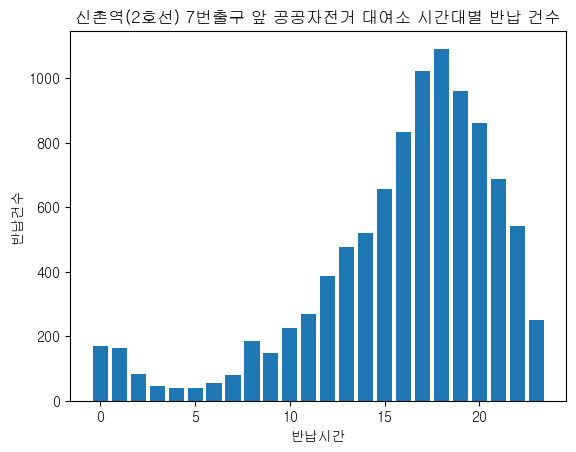

In [111]:
# 시간대별 반납건수
s_user_return= df_user['반납시간'].value_counts().sort_index()
x = s_user_return.index
y = s_user_return.values
plt.bar(x, y)
plt.title(place_final + ' 공공자전거 대여소 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

### 이용시간 통계

In [ ]:
# 이용시간 평균

In [112]:
df_user['이용시간'].mean()

30.338134640923485

In [ ]:
# 이용시간 최대

In [113]:
df_user['이용시간'].max()

1285.0

In [ ]:
# 이용시간 최소

In [114]:
df_user['이용시간'].min()

1.0